In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import sqlite3

In [4]:
conn = sqlite3.connect('cars.db')

In [5]:
sqlite3?

Type:        module
String form: <module 'sqlite3' from '/home/nebelgrau/miniconda3/envs/minimal_ds/lib/python3.7/sqlite3/__init__.py'>
File:        ~/miniconda3/envs/minimal_ds/lib/python3.7/sqlite3/__init__.py
Docstring:   <no docstring>


In [6]:
c = conn.cursor()

In [7]:
c.execute('''SELECT * FROM cars''')

In [9]:
conn.commit()

In [12]:
for row in c.execute('''SELECT model_year, AVG(horsepower) FROM cars GROUP BY model_year'''):
    print(row)
                     

(1970, 147.82758620689654)
(1971, 106.60714285714286)
(1972, 120.17857142857143)
(1973, 130.475)
(1974, 94.25925925925925)
(1975, 101.06666666666666)
(1976, 101.11764705882354)
(1977, 105.07142857142857)
(1978, 99.69444444444444)
(1979, 101.20689655172414)
(1980, 77.48275862068965)
(1981, 80.79310344827586)
(1982, 81.3225806451613)


In [26]:
query = '''SELECT model_year, origin, AVG(horsepower) FROM cars GROUP BY model_year, origin'''

In [27]:
for row in c.execute(query):
    print(row)

(1970, 'AMERICA', 166.95454545454547)
(1970, 'ASIA', 91.5)
(1970, 'EUROPE', 86.2)
(1971, 'AMERICA', 119.84210526315789)
(1971, 'ASIA', 82.4)
(1971, 'EUROPE', 74.0)
(1972, 'AMERICA', 138.77777777777777)
(1972, 'ASIA', 93.8)
(1972, 'EUROPE', 79.6)
(1973, 'AMERICA', 146.6206896551724)
(1973, 'ASIA', 98.5)
(1973, 'EUROPE', 81.85714285714286)
(1974, 'AMERICA', 111.0)
(1974, 'ASIA', 72.5)
(1974, 'EUROPE', 74.16666666666667)
(1975, 'AMERICA', 108.7)
(1975, 'ASIA', 80.25)
(1975, 'EUROPE', 89.5)
(1976, 'AMERICA', 110.5)
(1976, 'ASIA', 76.5)
(1976, 'EUROPE', 87.625)
(1977, 'AMERICA', 118.38888888888889)
(1977, 'ASIA', 81.16666666666667)
(1977, 'EUROPE', 81.0)
(1978, 'AMERICA', 107.27272727272727)
(1978, 'ASIA', 79.25)
(1978, 'EUROPE', 99.16666666666667)
(1979, 'AMERICA', 109.43478260869566)
(1979, 'ASIA', 65.0)
(1979, 'EUROPE', 72.0)
(1980, 'AMERICA', 88.83333333333333)
(1980, 'ASIA', 78.0)
(1980, 'EUROPE', 69.11111111111111)
(1981, 'AMERICA', 84.53846153846153)
(1981, 'ASIA', 78.33333333333333)

In [28]:
years = [row[0] for row in c.execute(query)]
origin = [row[1] for row in c.execute(query)]
values = [row[2] for row in c.execute(query)]

In [36]:
years = [item[0] for item in c.execute('''SELECT DISTINCT model_year FROM cars''')]
values = {}
for origin in ['EUROPE', 'ASIA', 'AMERICA']:
    values[origin] = [row[2] for row in c.execute(query) if row[1] == origin]
    


In [37]:
years

[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982]

In [66]:
origins = {'EUROPE': ('edge', 0.2, 'r'), 'AMERICA': ('center', 0.2, 'g'), 'ASIA': ('edge', -0.2, 'b')}

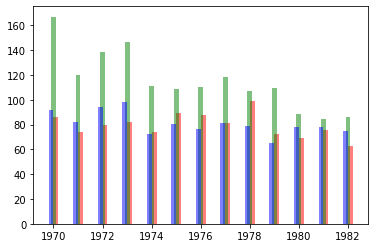

In [67]:
for origin in origins.keys():
    plt.bar(years, values[origin], color= origins[origin][2], width = origins[origin][1], align = origins[origin][0], alpha = 0.5)

In [33]:
values

{'EUROPE': [86.2,
  74.0,
  79.6,
  81.85714285714286,
  74.16666666666667,
  89.5,
  87.625,
  81.0,
  99.16666666666667,
  72.0,
  69.11111111111111,
  76.0,
  63.0],
 'ASIA': [91.5,
  82.4,
  93.8,
  98.5,
  72.5,
  80.25,
  76.5,
  81.16666666666667,
  79.25,
  65.0,
  78.0,
  78.33333333333333,
  74.55555555555556],
 'AMERICA': [166.95454545454547,
  119.84210526315789,
  138.77777777777777,
  146.6206896551724,
  111.0,
  108.7,
  110.5,
  118.38888888888889,
  107.27272727272727,
  109.43478260869566,
  88.83333333333333,
  84.53846153846153,
  86.2]}

<BarContainer object of 39 artists>

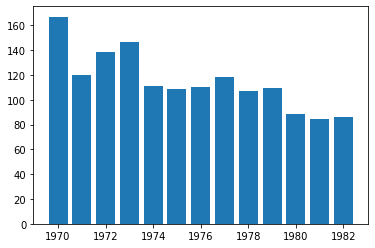

In [29]:
plt.bar(years, values)

Text(0.5, 1.0, 'average horsepower')

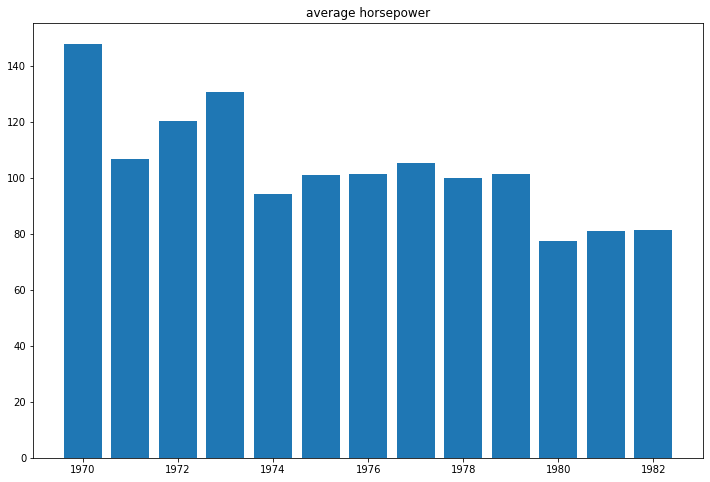

In [17]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.bar(years, values)
ax.set_title('average horsepower')


Text(0.5, 1.0, 'average horsepower')

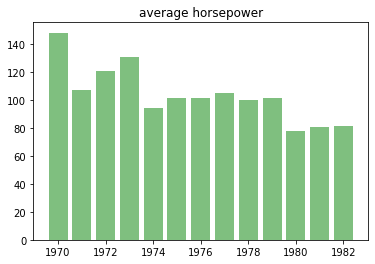

In [20]:
plt.bar(years, values, color = 'g', alpha = 0.5)
plt.title('average horsepower')

In [61]:
plt.bar?

Signature:
plt.bar(
    x,
    height,
    width=0.8,
    bottom=None,
    *,
    align='center',
    data=None,
    **kwargs,
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *width* and *height*. The vertical baseline
is *bottom* (default 0).

Each of *x*, *height*, *width*, and *bottom* may either be a scalar
applying to all bars, or it may be a sequence of length N providing a
separate value for each bar.

Parameters
----------
x : sequence of scalars
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : scalar or sequence of scalars
    The height(s) of the bars.

width : scalar or array-like, optional
    The width(s) of the bars (default: 0.8).

bottom : scalar or array-like, optional
    The y coordinate(s) of the bars bases (default: 0).

align : {'center', 'edge'}, optional, default: 'center'
    Alignment of the bars to the *x* coordinates:

 

In [49]:
brands = sorted([item[0] for item in c.execute('''SELECT DISTINCT brand FROM cars''')])

In [53]:
[item for item in c.execute('''SELECT * FROM cars WHERE brand = "{}"'''.format(brands[0]))]

[(3,
  'AMC',
  'REBEL SST',
  1970,
  'AMERICA',
  8,
  4981.667455999999,
  150.0,
  12.0,
  1557.1826062100001,
  14.6875),
 (9,
  'AMC',
  'AMBASSADOR DPL',
  1970,
  'AMERICA',
  8,
  6390.954959999999,
  190.0,
  8.5,
  1746.3306245,
  15.666666666666666),
 (16,
  'AMC',
  'HORNET',
  1970,
  'AMERICA',
  6,
  3261.0257359999996,
  97.0,
  15.5,
  1258.26523438,
  13.055555555555555),
 (24,
  'AMC',
  'GREMLIN',
  1970,
  'AMERICA',
  6,
  3261.0257359999996,
  90.0,
  15.0,
  1201.11259576,
  11.19047619047619),
 (33,
  'AMC',
  'GREMLIN',
  1971,
  'AMERICA',
  6,
  3801.798848,
  100.0,
  13.0,
  1194.76230258,
  12.368421052631579),
 (37,
  'AMC',
  'MATADOR',
  1971,
  'AMERICA',
  6,
  3801.798848,
  100.0,
  15.5,
  1491.41171256,
  13.055555555555555),
 (45,
  'AMC',
  'HORNET SPORTABOUT (SW)',
  1971,
  'AMERICA',
  6,
  4227.862512,
  110.0,
  13.5,
  1343.54059994,
  13.055555555555555),
 (66,
  'AMC',
  'AMBASSADOR SST',
  1972,
  'AMERICA',
  8,
  4981.667455999999,
